In [1]:
import timeit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def read_field_from_file(filename, num_halo=None):
    (rank, nbits, num_halo, nx, ny, nz) = np.fromfile(filename, dtype=np.int32, count=6)
    offset=(3 + rank) * 32 // nbits
    data = np.fromfile(filename, dtype=np.float32 if nbits == 32 else np.float64, \
                       count=nz * ny * nx + offset)
    if rank == 3:
        return np.reshape(data[offset:], (nz, ny, nx))
    else:
        return np.reshape(data[offset:], (ny, nx))

def validate_results(path):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    in_field = read_field_from_file(path + '/in_field.dat')
    im1 = axs[0].imshow(in_field[in_field.shape[0] // 2, :, :], origin='lower', vmin=-0.1, vmax=1.1);
    fig.colorbar(im1, ax=axs[0]);
    axs[0].set_title('Initial condition');

    out_field = read_field_from_file(path + '/out_field.dat')
    im2 = axs[1].imshow(out_field[out_field.shape[0] // 2, :, :], origin='lower', vmin=-0.1, vmax=1.1);
    fig.colorbar(im2, ax=axs[1]);
    axs[1].set_title('Final result');
    
    plt.show()

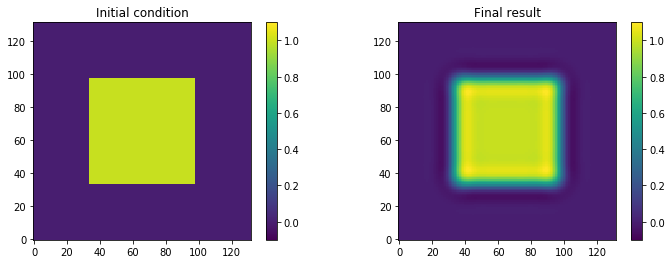

In [9]:
validate_results('../build/cray/src/openacc')